In [197]:
#21BAI1869
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [198]:
#21BAI1869
df=pd.read_csv("/content/data_set3")
df=pd.DataFrame(df)
df

,NaN,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,367,F,Lybia,Jordan,lowerlevel,G-02,A,French,S,Father,27,56,86,99,Yes,Good,Under-7,M
1,479,F,Tunis,Tunis,MiddleSchool,G-02,A,Quran,S,Father,62,53,1,88,Yes,Good,Under-7,H
2,154,M,KW,Iraq,lowerlevel,G-02,A,French,F,Father,25,0,13,56,No,Good,Under-7,L
3,240,F,KW,Iraq,MiddleSchool,G-08,A,Quran,S,Mum,NaN,99,2,11,No,Bad,Under-7,H
4,0,M,Jordan,Jordan,lowerlevel,G-08,A,History,F,Father,20,95,NaN,18,Yes,Good,Under-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,M,KW,Iran,MiddleSchool,G-08,A,Biology,S,Mum,60,78,23,99,Yes,Bad,Under-7,H
4996,302,F,Jordan,Jordan,MiddleSchool,G-09,A,French,F,Father,75,59,31,89,Yes,Good,Under-7,H
4997,52,F,Jordan,lebanon,MiddleSchool,G-07,A,Science,F,Mum,80,87,13,72,Yes,Good,Under-7,L
4998,479,F,Jordan,Jordan,MiddleSchool,G-08,A,Science,S,Father,72,64,39,99,Yes,Good,Under-7,H


In [199]:
df.isnull() #21BAI1869

,NaN,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Q1 .1**

In [200]:
#21BAI1869
df.drop("NaN",axis=1,inplace=True)
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,F,Lybia,Jordan,lowerlevel,G-02,A,French,S,Father,27,56,86,99,Yes,Good,Under-7,M
1,F,Tunis,Tunis,MiddleSchool,G-02,A,Quran,S,Father,62,53,1,88,Yes,Good,Under-7,H
2,M,KW,Iraq,lowerlevel,G-02,A,French,F,Father,25,0,13,56,No,Good,Under-7,L
3,F,KW,Iraq,MiddleSchool,G-08,A,Quran,S,Mum,NaN,99,2,11,No,Bad,Under-7,H
4,M,Jordan,Jordan,lowerlevel,G-08,A,History,F,Father,20,95,NaN,18,Yes,Good,Under-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,M,KW,Iran,MiddleSchool,G-08,A,Biology,S,Mum,60,78,23,99,Yes,Bad,Under-7,H
4996,F,Jordan,Jordan,MiddleSchool,G-09,A,French,F,Father,75,59,31,89,Yes,Good,Under-7,H
4997,F,Jordan,lebanon,MiddleSchool,G-07,A,Science,F,Mum,80,87,13,72,Yes,Good,Under-7,L
4998,F,Jordan,Jordan,MiddleSchool,G-08,A,Science,S,Father,72,64,39,99,Yes,Good,Under-7,H


In [201]:
df.isnull().sum()#21BAI1869

gender                        0
NationalITy                   0
PlaceofBirth                  0
StageID                       0
GradeID                       0
SectionID                     0
Topic                         0
Semester                      0
Relation                      0
raisedhands                 246
VisITedResources              0
AnnouncementsView           344
Discussion                    0
ParentAnsweringSurvey         0
ParentschoolSatisfaction      0
StudentAbsenceDays            0
Class                         0
dtype: int64

In [202]:
raised_hands=df.raisedhands.mode()[0] #21BAI1869
Announcements_View=df.AnnouncementsView.mode()[0]

In [203]:
df["raisedhands"]=df["raisedhands"].fillna(raised_hands)    #21BAI1869
df["AnnouncementsView"]=df["AnnouncementsView"].fillna(Announcements_View)
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].map({'Under-7': 0, 'Above-7': 1})
df['GradeId'] = df['GradeID'].str.replace('G-', '')


In [204]:
df.isnull().sum()     #21BAI1869

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
GradeId                     0
dtype: int64

Q1**.2**

In [205]:
#21BAI1869
df.describe()

,VisITedResources,Discussion,StudentAbsenceDays
count,5000.000000,5000.000000,5000.00000
mean,51.329800,49.549800,0.30920
std,36.129574,32.832873,0.46221
min,0.000000,1.000000,0.00000
25%,11.000000,24.000000,0.00000
50%,58.000000,47.000000,0.00000
75%,84.000000,79.000000,1.00000
max,99.000000,99.000000,1.00000


In [206]:
df    #21BAI1869

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,GradeId
0,F,Lybia,Jordan,lowerlevel,G-02,A,French,S,Father,27,56,86,99,Yes,Good,0,M,02
1,F,Tunis,Tunis,MiddleSchool,G-02,A,Quran,S,Father,62,53,1,88,Yes,Good,0,H,02
2,M,KW,Iraq,lowerlevel,G-02,A,French,F,Father,25,0,13,56,No,Good,0,L,02
3,F,KW,Iraq,MiddleSchool,G-08,A,Quran,S,Mum,10,99,2,11,No,Bad,0,H,08
4,M,Jordan,Jordan,lowerlevel,G-08,A,History,F,Father,20,95,12,18,Yes,Good,0,M,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,M,KW,Iran,MiddleSchool,G-08,A,Biology,S,Mum,60,78,23,99,Yes,Bad,0,H,08
4996,F,Jordan,Jordan,MiddleSchool,G-09,A,French,F,Father,75,59,31,89,Yes,Good,0,H,09
4997,F,Jordan,lebanon,MiddleSchool,G-07,A,Science,F,Mum,80,87,13,72,Yes,Good,0,L,07
4998,F,Jordan,Jordan,MiddleSchool,G-08,A,Science,S,Father,72,64,39,99,Yes,Good,0,H,08


In [207]:
df.dtypes


gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                 object
VisITedResources             int64
AnnouncementsView           object
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays           int64
Class                       object
GradeId                     object
dtype: object

In [208]:
df1 = df[df['Topic'] == 'Mathematics']['ParentAnsweringSurvey'].count()
df1

0

Q1**.3**

In [209]:
father_count = df[df['ParentAnsweringSurvey'] == 'Father'].shape[0]
total_count = df.shape[0]
father_percentage = (father_count / total_count) * 100
print(father_percentage)


0.0


Q1**.4**

<Axes: xlabel='StudentAbsenceDays', ylabel='StageID'>

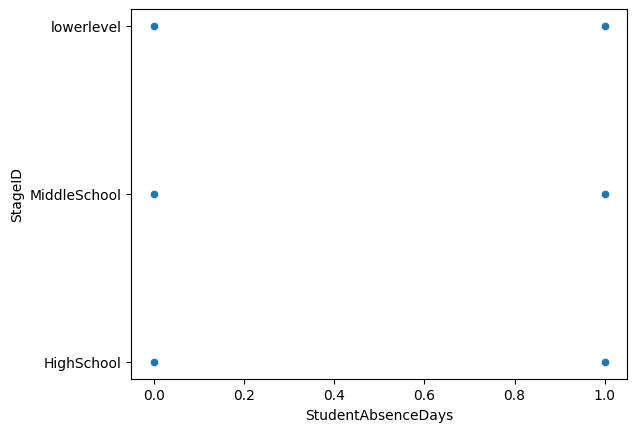

In [210]:
#21BAI1869
#df.boxplot(column=['StudentAbsenceDays', 'StageID'])   #21BAI1869
sns.scatterplot(x='StudentAbsenceDays', y='StageID', data=df)


<ipython-input-211-15282e743fc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()    #21BAI1869


<Axes: >

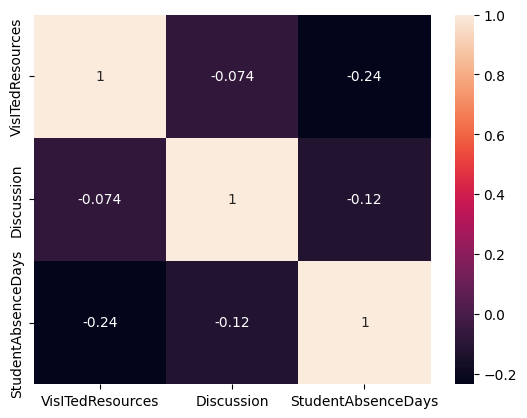

In [211]:
corr = df.corr()    #21BAI1869
sns.heatmap(corr, annot=True)

Q **2.1**

Problem Statement:- To classify the given data to predict the correct classification based on Logistic Regression And to evaluate the metrics of our model.

Q2**.2**

In [212]:
#21BAI1869
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [213]:
#21BAI1869
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


non_numeric_cols = X_train.select_dtypes(include=['object']).columns.tolist()

for col in non_numeric_cols:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)







/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [214]:
#missing_cols = X_train.column[X_train.isnull().any()].tolist()
#21BAI1869
'''for col in missing_cols:
    col_median = X_train[col].median()
    X_train[col].fillna(col_median, inplace=True)
    X_test[col].fillna(col_median, inplace=True)'''

'for col in missing_cols:\n    col_median = X_train[col].median()\n    X_train[col].fillna(col_median, inplace=True)\n    X_test[col].fillna(col_median, inplace=True)'

In [215]:
#21BAI1869
model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: ignored

Q2**.3**

In [ ]:
#21BAI1869
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)


Q3**.1**

In [ ]:
#21BAI1869
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_train)


Q4**.1**

In [ ]:
#21BAI1869 {MARKS WILL BE AWARDED BASED ON BEST OF BOTH CLASSIFIERS.}